# Multiple Linear Regression 

## Regression - Linear Relationship
1. Linear Regression 
2. Robust Regression
>- Hiber Regression
>- RANSAC Regression
>- Theil-Sen Regression

In [2]:
# import necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# import data
# https://www.kaggle.com/datasets/abhishek14398/50startups
data = pd.read_csv('../Data/50_Startups_dataset.csv')
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [4]:
# drop the first column
data.drop(data.columns[0], axis=1, inplace=True)

In [5]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# A. Linear Regression

In [6]:
# split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Profit', axis=1),
                                                    data['Profit'],
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# data preprocessing 
preprocessor = ColumnTransformer(transformers=[
    ('num_scaler', StandardScaler(), numeric_cols ),
    ('encoder', OneHotEncoder(drop='first'), ['State']) # omits one dummy variable to byepass dummy variable trap
], remainder='passthrough')

# creating the regressor 
regressor = LinearRegression()

# create the pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit the pipeline 
pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('regressor', LinearRegression())])

In [8]:
X_train['State'].unique()

array(['Florida', 'California', 'New York'], dtype=object)

Since there are three unique values in the `State` column of the X_train, when `OneHotEncoder()` is applied it will create three dummy variables. However, two dummy variables are sufficient. Hence, the `OneHotEncoder(drop='first')` drops one dummy variable.  

## 🎭 What Is the Dummy Variable Trap?

It’s a situation where **one-hot encoded categorical variables** introduce **multicollinearity** into your dataset—that is, one feature becomes **predictable from others**, leading to **redundancy**.

---

### 📦 Real-Life Analogy:

Let’s say you’re encoding a column called `Color` with three categories:
- Red  
- Green  
- Blue

**One-hot encoding** creates 3 binary columns:

| Color_Red | Color_Green | Color_Blue |
|-----------|-------------|------------|
| 1         | 0           | 0          |
| 0         | 1           | 0          |
| 0         | 0           | 1          |

But here’s the thing:  
🔁 If you know **any two**, you can **always guess the third**. For example, if `Color_Red = 0` and `Color_Green = 0`, then `Color_Blue` must be 1.

That’s **linear dependence**, and it can **confuse linear models** like Linear Regression or Logistic Regression.

---

## ⚠️ Why It’s a Problem
In models like:
- Linear Regression
- Logistic Regression

...multicollinearity causes:
- Coefficient instability
- Incorrect interpretations
- Model fitting issues

---

## ✅ How to Avoid the Dummy Variable Trap

Drop one of the dummy variables. You still retain all the information but avoid redundancy.

In **pandas**:
```python
pd.get_dummies(df['Color'], drop_first=True)
```

In **Scikit-learn**:
    
```python
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(df[['Color']])
```

---

## 🚀 Bonus Tip
If you're using **tree-based models** (like Random Forest, XGBoost), this isn’t a big issue—they handle categorical splits more robustly. But for linear models, **always watch out for the dummy variable trap**!

---

In [9]:
preprocessor.fit_transform(X_train)

array([[ 0.34202149,  0.22787678,  0.12425038,  1.        ,  0.        ],
       [ 1.36207849, -1.0974737 ,  1.14990688,  1.        ,  0.        ],
       [-0.71081297, -2.5770186 , -0.34136825,  0.        ,  0.        ],
       [ 0.90611438,  1.0172367 ,  0.66890185,  0.        ,  1.        ],
       [ 1.40997088, -0.09115403,  1.30006861,  0.        ,  1.        ],
       [ 1.20367103,  0.96116332, -0.95248784,  0.        ,  0.        ],
       [-1.05285826, -1.34392538, -0.62843389,  1.        ,  0.        ],
       [-1.61480906, -0.19649414,  0.54106768,  1.        ,  0.        ],
       [-1.642623  ,  0.52691442, -2.07854935,  0.        ,  0.        ],
       [ 0.77885123,  0.05437051,  0.2294954 ,  0.        ,  1.        ],
       [ 0.96515572, -0.45976843,  0.61043134,  0.        ,  0.        ],
       [ 0.00687736,  0.01677049,  0.25215324,  0.        ,  0.        ],
       [-0.01361318, -0.80643974, -0.83912073,  0.        ,  1.        ],
       [-0.66099544,  1.34830937, -0.2

In [10]:
# get the parameters of the model 
intercept = pipeline.named_steps['regressor'].intercept_
coef = pipeline.named_steps['regressor'].coef_

print(f'The intercept of the model is : {intercept} and the coeffecient is : {coef}')

The intercept of the model is : 115320.97192585879 and the coeffecient is : [ 3.81022693e+04 -1.86475430e+03  3.38617581e+03  9.38793006e+02
  6.98775997e+00]


In [11]:
# predict 
y_predict = pipeline.predict(X_test)
y_predict

array([126362.97908252,  84608.55383643,  99677.59425155,  46357.56068582,
       128750.58288497,  50912.51741905, 109741.450327  , 100643.34281644,
        97599.375746  , 113097.52524437])

R² Score: 0.899
MSE: 82010363.045
RMSE: 9055.957
MAE: 6961.478


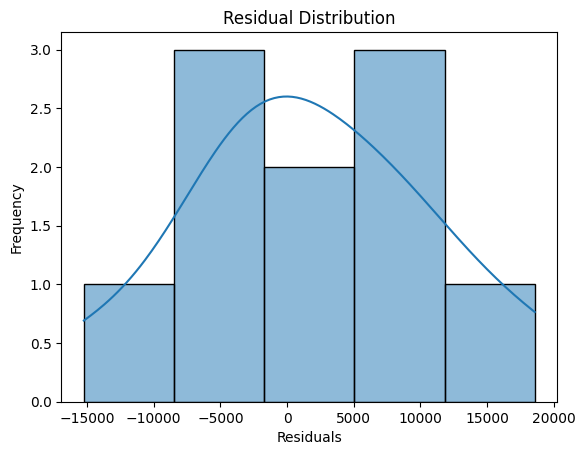

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

**Detailed summary chart** comparing various **feature selection methods** in **scikit-learn**, their best use cases, advantages, disadvantages, and whether they can be used inside a **Pipeline**.

---

## **📊 Feature Selection Methods in Scikit-Learn: Comparison Chart**

| **Method**                   | **Best For**                                      | **How It Works**                                     | **Pros**                                      | **Cons**                                          | **Pipeline Compatible?** |
|------------------------------|--------------------------------------------------|-----------------------------------------------------|-----------------------------------------------|--------------------------------------------------|--------------------------|
| **RFE (Recursive Feature Elimination)** | Linear models, models with coefficients | Recursively removes least important features based on model performance | ✔ Works well with small datasets  <br> ✔ Selects optimal feature subset | ❌ Computationally expensive <br> ❌ Can be unstable with correlated features | ✅ Yes |
| **SelectKBest** | Quick feature filtering using statistics | Selects top K features based on statistical tests (ANOVA, Chi-square, etc.) | ✔ Fast and simple <br> ✔ Works for regression & classification | ❌ Ignores feature interactions <br> ❌ Requires choosing K manually | ✅ Yes |
| **SelectFromModel** | Models with built-in feature importance (Lasso, RandomForest, etc.) | Uses model coefficients (`coef_`) or feature importances (`feature_importances_`) | ✔ Automatically selects important features <br> ✔ Works well with Lasso, Trees | ❌ Model-dependent <br> ❌ Can be sensitive to hyperparameters | ✅ Yes |
| **Lasso Regression (L1 Regularization)** | Feature selection & regression in one step | Shrinks some coefficients to **exactly zero**, removing unimportant features | ✔ Works for high-dimensional data <br> ✔ No need for separate feature selection | ❌ Requires hyperparameter tuning (`alpha`) <br> ❌ May not work well if features are highly correlated | ✅ Yes |
| **Mutual Information** | Detecting **non-linear** dependencies | Measures mutual dependence between features & target | ✔ Captures **non-linear** relationships <br> ✔ Works with categorical & continuous data | ❌ Computationally expensive <br> ❌ Needs tuning (`discretization`) | ❌ No (Requires manual selection) |
| **Permutation Importance** | Most robust feature ranking | Shuffles each feature and measures performance drop | ✔ Works for **any model** <br> ✔ Not affected by scaling | ❌ Expensive for large datasets <br> ❌ Can be noisy | ❌ No (Requires manual analysis) |

---

## **🚀 Which Method Should You Use?**
| **Your Need** | **Recommended Feature Selection Method** |
|--------------|---------------------------------------|
| Fast & simple selection | **SelectKBest** |
| Best for regression with many features | **Lasso (L1 Regularization)** |
| Feature importance from models | **SelectFromModel (Lasso, RandomForest, XGBoost, etc.)** |
| Finds **non-linear** relationships | **Mutual Information** |
| Most **robust** feature ranking | **Permutation Importance** |

### 🚀 Pipeline with RFE & ColumnTransformer

In [13]:
from sklearn.feature_selection import RFE


# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# Feature Selection using RFE with Linear Regression
rfe = RFE(estimator=LinearRegression(),
          n_features_to_select=3) # select the top 3 features 

regressor = LinearRegression()

# Define Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', rfe),
    ('regressor', regressor)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scalar',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('feature_selection',
                 RFE(estimator=LinearRegression(), n_features_to_select=3)),
                ('regressor', LinearRegression())])

In [14]:
# Get selected feature mask
selected_features = pipeline.named_steps['feature_selection'].support_
selected_features

array([ True,  True,  True, False, False])

In [15]:
# get the features selected 
all_features = np.array(numeric_cols + list(
    pipeline.named_steps['preprocessor'].named_transformers_['encoder'].get_feature_names_out()
))
selected_feature_names = all_features[selected_features]
selected_feature_names

array(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='<U15')

In [16]:
# intercept and coeff 
print(f'Intercept : {pipeline.named_steps['regressor'].intercept_}')
print(f'Coeffecients : {pipeline.named_steps['regressor'].coef_}')

Intercept : 115651.8205
Coeffecients : [38014.73625775 -1841.47578233  3543.38628169]


In [17]:
# let us now predict 
y_predict = pipeline.predict(X_test)

R² Score: 0.900
MSE: 80926321.223
RMSE: 8995.906
MAE: 6979.152


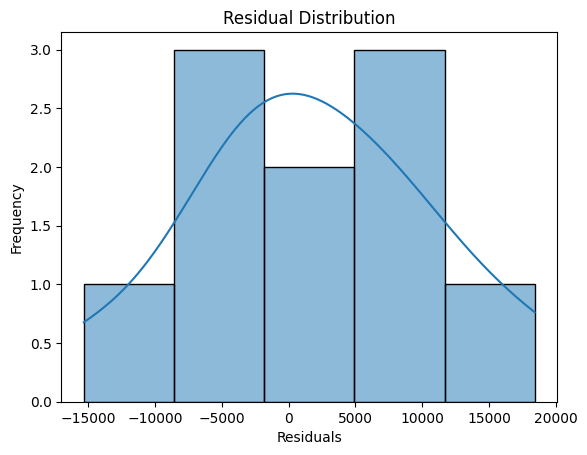

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

## Pipeline with `SelectFromModel`

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# Feature selection using Lasso (L1 Regularization)
feature_selector = SelectFromModel(Lasso(alpha=0.01))

regressor = LinearRegression()

# Define Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('regressor', regressor)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scalar',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.01))),
                ('regressor', LinearRegression())])

In [20]:
# get the features selected 
all_features = np.array(numeric_cols + list(
    pipeline.named_steps['preprocessor'].named_transformers_['encoder'].get_feature_names_out()
))

selected_features = pipeline.named_steps['feature_selection'].get_support()
selected_feature_names = all_features[selected_features]
selected_feature_names

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'], dtype='<U15')

R² Score: 0.899
MSE: 82010363.045
RMSE: 9055.957
MAE: 6961.478


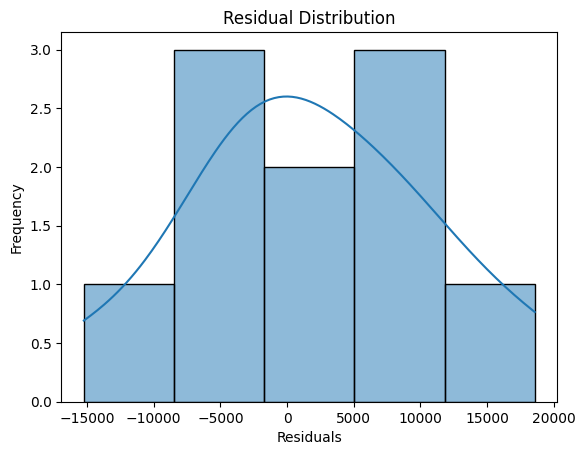

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
y_predict = pipeline.predict(X_test)

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

## Pipeline with `SelectKBest`

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# Feature selection using Lasso (L1 Regularization)
feature_selector = SelectKBest(score_func=f_regression, k=3)

regressor = LinearRegression()

# Define Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('regressor', regressor)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scalar',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('feature_selection',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x000001BF09423CE0>)),
                ('regressor', LinearRegression())])

In [23]:
# get the features selected 
all_features = np.array(numeric_cols + list(
    pipeline.named_steps['preprocessor'].named_transformers_['encoder'].get_feature_names_out()
))

selected_features = pipeline.named_steps['feature_selection'].get_support()
selected_feature_names = all_features[selected_features]
selected_feature_names

array(['R&D Spend', 'Marketing Spend', 'State_New York'], dtype='<U15')

`f_regression` is a **statistical scoring function** used in feature selection, especially with tools like `SelectKBest` in scikit-learn. It's designed for **regression tasks**, and it evaluates each feature’s **linear relationship with the target variable** using **univariate linear regression tests**.

---

### 🔍 What Does `f_regression` Do?

It computes:
- **F-statistic** for each feature
- Corresponding **p-value**

The **F-statistic** measures how much a feature explains the variance in the target variable — higher means more predictive power.

---

### 📌 Where Is It Used?

Typically used with `SelectKBest`:
```python
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)
```

---

### 📐 How Does It Work?

For each feature $(X_i)$ and target $( y $):
1. A **simple linear regression** is performed.
2. The **F-statistic** is calculated: 
   $F = \frac{\text{variance explained by } X_i}{\text{unexplained variance}}$
   
3. A **p-value** is generated to test the null hypothesis that there's **no relationship** between the feature and the target.

---

### ✅ When to Use `f_regression`?

- When you're working on a **regression problem**
- You want **quick filtering** of the most linearly correlated features

---

### 🚫 Limitations

- Only captures **linear relationships**
- Doesn’t consider interactions between features
- Doesn’t work for **classification** tasks (use `f_classif` instead)

---

R² Score: 0.916
MSE: 67943465.807
RMSE: 8242.783
MAE: 6430.578


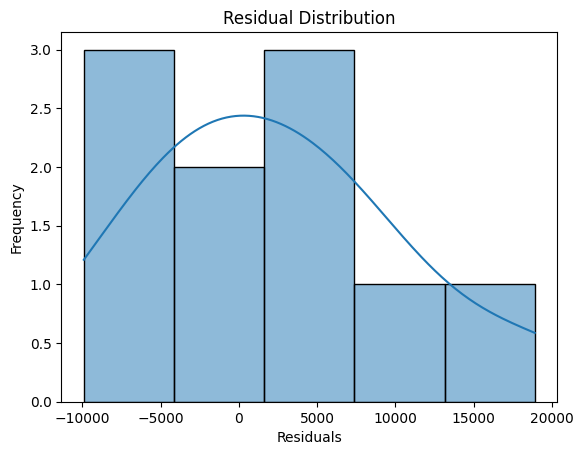

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
y_predict = pipeline.predict(X_test)

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# B. Huber Regression 

### 🔧 Huber Regressor — Robust Regression in Scikit-learn

The **Huber Regressor** is a type of **robust regression model** that combines the strengths of **Least Squares Regression** and **Least Absolute Deviations (L1 Regression)**. It’s less sensitive to **outliers** than traditional linear regression.

---

### 📌 Why Use Huber Regressor?

Ordinary Linear Regression minimizes **squared errors**, so a few outliers can throw off the whole model. Huber Regressor helps fix that by:
- Acting like **squared loss** for small errors (like linear regression)
- Acting like **absolute loss** for large errors (like Lasso)

---

### 🔢 The Huber Loss Function

$
L_{\delta}(r) =
\begin{cases}
\frac{1}{2}r^2 & \text{for } |r| \leq \delta \\
\delta (|r| - \frac{1}{2} \delta) & \text{for } |r| > \delta
\end{cases}
$

Where:
- $ r $ = residual = (actual - predicted)
- $ \delta $ = threshold to switch from quadratic to linear loss

---

### 💡 When Should You Use It?

| Scenario                                 | Use Huber? |
|------------------------------------------|------------|
| Dataset with **outliers**                | ✅ Yes     |
| Clean dataset with **normally distributed errors** | ❌ No (use LinearRegression) |
| Want **faster** training than RANSAC     | ✅ Yes     |

---

### 🔨 How to Use in Scikit-learn

```python
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Huber works best with scaled features
model = make_pipeline(StandardScaler(), HuberRegressor(epsilon=1.35))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

- `epsilon`: Controls the point where loss function switches. Default is `1.35`, which gives ~95% efficiency for normal data.
- `max_iter`: Number of iterations to converge.

---

### ✅ Pros

- Robust to **outliers**
- Works well even when a small % of data is bad
- Faster than RANSAC or Theil–Sen

### ❌ Cons

- Doesn’t handle **non-linearity**
- Requires scaling of features
- Sensitive to the `epsilon` hyperparameter


In [25]:
from sklearn.linear_model import HuberRegressor

# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# make the pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', HuberRegressor(epsilon=1.35, max_iter=1000))
])

# fit the pipeline 
pipeline.fit(X_train, y_train)

# predict
y_predict = pipeline.predict(X_test)


R² Score: 0.910
MSE: 72785561.591
RMSE: 8531.445
MAE: 6872.597


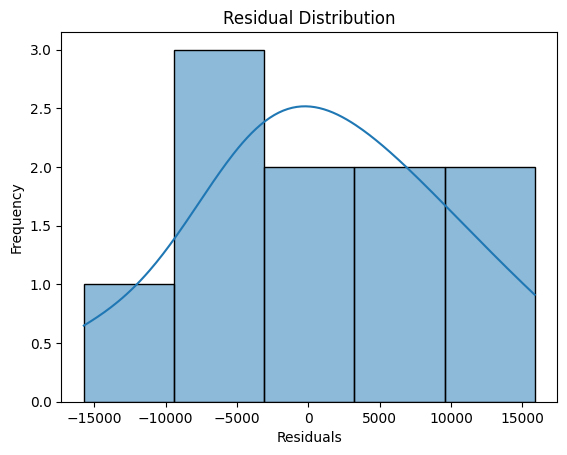

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# C. RANSAC Regression

### Step 1: Find the `residual_threshold`

In [27]:
import numpy as np

numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# data preprocessing 
preprocessor = ColumnTransformer(transformers=[
    ('num_scaler', StandardScaler(), numeric_cols ),
    ('encoder', OneHotEncoder(drop='first'), ['State']) # omits one dummy variable to byepass dummy variable trap
], remainder='passthrough')

# creating the regressor 
regressor = LinearRegression()

# create the pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit the pipeline 
pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

# Compute residuals
residuals = np.abs(y_test - y_pred)

# Choose a threshold — e.g., 75th percentile
threshold = np.percentile(residuals, 75)
print(f"Suggested residual_threshold: {threshold:.2f}")

Suggested residual_threshold: 9245.69


### Step 2: Apply the `RANSACRegressor`

In [28]:
from sklearn.linear_model import RANSACRegressor

# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# make the pipeline 
# RANSAC will fit Linear Regression models repeatedly on random subsets to find a robust model that ignores outliers.

regressor = RANSACRegressor(estimator =LinearRegression(),
                            min_samples=0.5, # Use 50% of the data for each iteration
                            residual_threshold = 9245.69,  # if standardized, only consider points within 2 units as inliers
                            max_trials=1000
                            )
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor )
])

# fit the pipeline 
pipeline.fit(X_train, y_train)

# predict
y_predict = pipeline.predict(X_test)

R² Score: 0.905
MSE: 77243155.506
RMSE: 8788.809
MAE: 6770.803


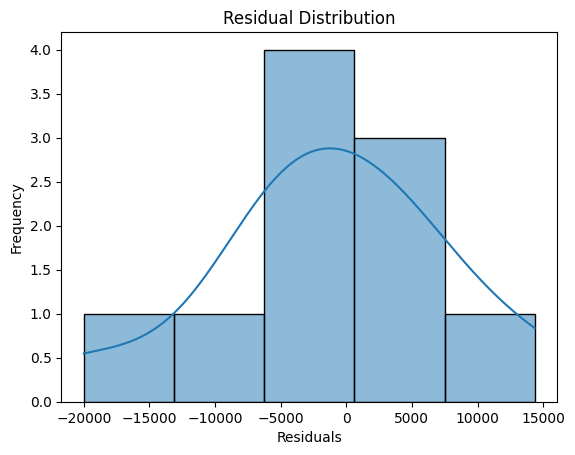

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

Let us now see the `inliers` and the `outliers`

#### 🧩 Think of RANSAC like a game show...

Imagine you're picking a few players from the audience (data points), checking how closely they follow a rule (model), and then deciding if they belong in your winning team (inliers).

#### 📌 min_samples
This is the minimum number of data points RANSAC uses to propose a model in each iteration.

**Think of it as: “How many people do I need to get a sense of the trend?”**

✅ Example:
- min_samples=2 for linear regression (since two points define a line).
- Can also be a fraction, like min_samples=0.5, which means 50% of the data.

💡 Tip:
- Use a small number for speed.
- Use a higher number if you suspect a lot of noise or want stronger base fits.

#### 📌 residual_threshold
This defines what counts as an inlier.

It's the maximum distance (error) between the true data point and the predicted point for it to be considered an inlier.

🧮 Mathematically:

$
\|y_{\text{true}} - y_{\text{predicted}}\|$ < residual_threshold


✅ Example:
If residual_threshold = 5.0, then any point within ±5 of the predicted value is an inlier.

### 🎯 Set this based on:
- The scale of your data.
- The amount of noise you're okay with.
- You can tune it using cross-validation.




In [30]:
inlier_mask = pipeline.named_steps['regressor'].inlier_mask_
outlier_mask = ~inlier_mask

# Now you can plot them separately!
inlier_mask

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True])

In [31]:
inliers_X = X_train[inlier_mask]
inliers_X

,R&D Spend,Administration,Marketing Spend,State
4,142107.44,91391.87,366168.52,Florida
37,44070.05,51283.24,197029.52,California
8,120542.62,148719.05,311613.39,New York
3,144372.51,118671.95,383199.72,New York
6,134615.56,147198.97,127716.92,California
41,27893.02,84710.87,164470.81,Florida
46,1315.56,115816.31,297114.56,Florida
47,0.10,135427.02,0.10,California
9,123334.98,108679.27,304981.72,California
16,78013.21,121597.65,264346.16,California


In [32]:
inliers_y = y_train[inlier_mask]
len(inliers_y)

33

That array you're seeing — `inlier_mask` — is super important when working with robust models like `RANSACRegressor`. Here's a clear explanation of what it means:

---

### 🔍 What is `inlier_mask`?

It's a Boolean array that tells you which samples from your training data were **considered inliers** by the RANSAC algorithm — i.e., points that **fit well** to the regression model, based on the `residual_threshold` you set.

---

### 🧠 Breakdown of Your Array:
```python
array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True])
```

This array has the **same length as your training set**. Each value means:

- `True`: This sample is an **inlier** → used in fitting the final model.
- `False`: This sample is an **outlier** → ignored in final model training.

---

### ✅ How to Use This?

You can use `inlier_mask_` (from `ransac.inlier_mask_`) to:
- **Visualize** inliers vs outliers:
  ```python
  inliers_X = X_train[inlier_mask]
  inliers_y = y_train[inlier_mask]

  outliers_X = X_train[~inlier_mask]
  outliers_y = y_train[~inlier_mask]
  ```

- **Plot them differently** on a scatter plot:
  ```python
  import matplotlib.pyplot as plt

  plt.scatter(inliers_X, inliers_y, color='blue', label='Inliers')
  plt.scatter(outliers_X, outliers_y, color='red', label='Outliers')
  plt.legend()
  plt.show()
  ```

- **Analyze** how robust the model is — how many data points it ignored.

---

### 📊 Quick Tip:
You can check how many were inliers and outliers:
```python
print("Inliers:", np.sum(inlier_mask))
print("Outliers:", np.sum(~inlier_mask))
```

In [33]:
print("Inliers:", np.sum(inlier_mask))
print("Outliers:", np.sum(~inlier_mask))

Inliers: 33
Outliers: 7


# D. Theil-Sen Regression


Let's break down **Theil–Sen Regression**, also known as **Theil–Sen Estimator**, from both a **conceptual** and **mathematical** perspective.

---

## 🔍 What is Theil–Sen Regression?

**Theil–Sen Estimator** is a **robust linear regression technique** that is **resistant to outliers**. Instead of minimizing squared errors (like OLS), it estimates the slope as the **median** of all pairwise slopes between points.

It's **non-parametric**, meaning it doesn’t assume a specific distribution for errors.

---

## 📈 Intuition

Imagine drawing a line between every pair of points in your dataset. Each line gives you a slope. The **median of all these slopes** is chosen as the **best estimate for the true slope**.

Once the slope is determined, the **intercept** is calculated as the **median of all intercepts** using this slope.

---

## 🧠 Mathematics Behind Theil–Sen

Given data points:  
$
(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)
$

### 🔹 Step 1: Compute Pairwise Slopes
For every pair \( (i, j) \) where \( i < j \):

$
m_{ij} = \frac{y_j - y_i}{x_j - x_i}, \quad \text{for } x_j \ne x_i
$

You’ll get $ \binom{n}{2} $ such slopes.

### 🔹 Step 2: Estimate Slope $ \hat{m} $

$
\hat{m} = \text{median} \left\{ m_{ij} \right\}
$

This median slope is **robust** to outliers, unlike OLS which squares errors.

### 🔹 Step 3: Estimate Intercept $ \hat{b} $

For each point $ (x_i, y_i) $, calculate:

$
b_i = y_i - \hat{m} \cdot x_i
$

Then,

$
\hat{b} = \text{median} \left\{ b_i \right\}
$

### 🔹 Final Model

$
\hat{y} = \hat{m} \cdot x + \hat{b}
$

---

## ✅ Advantages

- **Robust to outliers**
- **Simple** and interpretable
- Doesn’t assume Gaussian noise
- Performs well in **heteroscedastic** or **non-Gaussian** situations

---

## ⚠️ Drawback

- Computationally expensive for large datasets due to $ O(n^2) $ pairwise slope computations. But optimized versions exist (like `sklearn.linear_model.TheilSenRegressor`).

In [34]:
from sklearn.linear_model import TheilSenRegressor

# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# make the pipeline 
# RANSAC will fit Linear Regression models repeatedly on random subsets to find a robust model that ignores outliers.

regressor = TheilSenRegressor()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor )
])

# fit the pipeline 
pipeline.fit(X_train, y_train)

# predict
y_predict = pipeline.predict(X_test)

In [35]:
print(f'Intercept:{pipeline.named_steps['regressor'].intercept_}')
print(f'Coeffecients:{pipeline.named_steps['regressor'].coef_}')

Intercept:115875.15207874466
Coeffecients:[37289.87165416 -1334.77688775  3483.0569055    635.05901425
  -622.33000574]


R² Score: 0.907
MSE: 75555136.455
RMSE: 8692.246
MAE: 6812.864


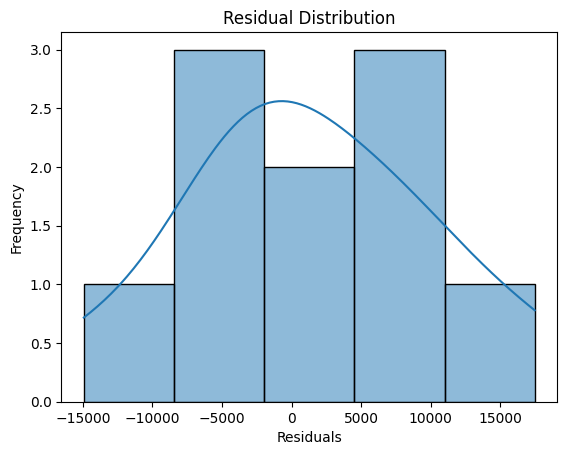

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

Let's break down **RANSAC** and **Theil–Sen**, two **robust regression techniques** that, like the **Huber Regressor**, are designed to perform well even when the data contains **outliers**.

---

## 📌 1. RANSAC (RANdom SAmple Consensus)

### 🧠 Idea:
RANSAC fits the model only to **inliers**, i.e., the data points that **fit well**, and ignores the outliers.

### ⚙️ How it works:
1. Randomly select a **subset of data**.
2. Fit the model to that subset.
3. Test all points: count how many are **close** to the model (inliers).
4. Repeat the process **multiple times**.
5. Choose the model with the **most inliers**.

### ✅ Pros:
- Very **robust to outliers**.
- Good for datasets with **gross errors** or **anomalies**.

### ❌ Cons:
- **Non-deterministic** (results can vary).
- Can be **slow** if lots of iterations are needed.
- May not find the optimal model if parameters are not tuned properly.

### 📦 Example in scikit-learn:
```python
from sklearn.linear_model import RANSACRegressor, LinearRegression

model = RANSACRegressor(LinearRegression(), min_samples=0.5, residual_threshold=5.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

---

## 📌 2. Theil–Sen Estimator

### 🧠 Idea:
Theil–Sen is a **non-parametric** method that estimates the slope as the **median** of all pairwise slopes between points.

- It’s a **robust estimator** of a linear trend — unaffected by a few bad points.
- Works well in **low-dimensional data** (mostly univariate regression).

### ⚙️ How it works:
- For each pair of points, compute the slope.
- The final slope is the **median** of these slopes.
- The intercept is chosen accordingly.

### ✅ Pros:
- Very **robust to outliers**.
- **Deterministic** (results are stable).
- Works even when up to **29% of data is corrupted**.

### ❌ Cons:
- Computationally **expensive** for large datasets.
- Limited to **linear models**.

### 📦 Example in scikit-learn:
```python
from sklearn.linear_model import TheilSenRegressor

model = TheilSenRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

---

## 📊 Summary Table

| Regressor         | Robust to Outliers | Speed     | Deterministic | Notes                                  |
|-------------------|--------------------|-----------|----------------|----------------------------------------|
| Linear Regression | ❌ No               | ✅ Fast   | ✅ Yes         | Sensitive to outliers                  |
| Huber Regressor   | ⚠️ Moderate         | ✅ Fast   | ✅ Yes         | Balance between squared and absolute loss |
| RANSAC            | ✅ Very             | ❌ Slower | ❌ No          | Random sampling — best for heavy outliers |
| Theil–Sen         | ✅ Very             | ⚠️ Medium | ✅ Yes         | Great for univariate; very robust      |
